## K-Means Clustering
- 독립 변수의 특성이 유사한 데이터의 그룹을 Cluster이라고 한다. 주어진 데이터를 여러개의 클러스터로 구분하는 것을 Clustering이라고 한다. 만약 클러스터의 갯수가 K 라면, Klustering은 모든 데이터에 대해 각 데이터가 1번부터 K번 클러스터 중에 어떤 클러스터에 속하는지 예측하는 작업이다.

### K-Means

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\font_manager.py:1320: UserWarning: findfont: Font family ['nanumgothic'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


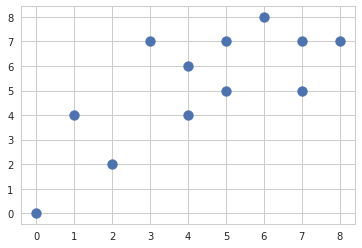

In [2]:
%matplotlib inline
X = np.array([[7, 5], [5,7], [7,7], [4,4], [4,6], [1,4],
              [0, 0], [2,2], [8,7], [6,8], [5,5], [3,7]])
plt.scatter(X[:, 0], X[:, 1], s = 100)
plt.show()

In [8]:
from sklearn.cluster import KMeans

##  1 회차

In [10]:
model1 = KMeans(n_clusters=2, init='random', n_init = 1,
              max_iter=1, random_state=1).fit(X)

In [14]:
c0, c1 = model1.cluster_centers_
c0, c1

(array([6.6, 6.8]), array([2.71428571, 4.        ]))

In [15]:
# c0의 centroid = (6.6, 6.8)
# c1의 centroid = (2.7142, 4)

In [16]:
model1.score(X)

-63.00408163265301

In [33]:
def plot_cluster(model, c0, c1):
    plt.scatter(X[model.labels_ == 0, 0], 
                X[model.labels_ == 0, 1], s=100, marker = 'v', c= 'r')
    plt.scatter(X[model.labels_ == 1, 0],
                X[model.labels_ == 1, 1], s=100, marker = '^' , c= 'b')
    plt.scatter(c0[0], c0[1], s=200, c='r')
    plt.scatter(c1[0], c1[1], s=200, c='b')
    plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\font_manager.py:1320: UserWarning: findfont: Font family ['nanumgothic'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


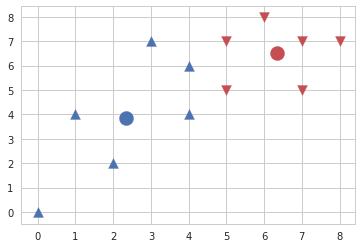

In [57]:
plot_cluster(model1, c0, c1)

In [37]:
def kmeans_df(model, c0, c1):
    df = pd.DataFrame(np.hstack([X, 
                                 np.linalg.norm(X - c0, axis = 1)[:, np.newaxis], 
                                 np.linalg.norm(X - c1, axis = 1)[:, np.newaxis], 
                                 model.labels_[:, np.newaxis]]),
                     columns = ['x0', 'x1', 'd0', 'd1', 'c'])
    return df

In [38]:
kmeans_df(model1, c0, c1)

,x0,x1,d0,d1,c
0,7.0,5.0,1.843909,4.400835,0.0
1,5.0,7.0,1.612452,3.771537,0.0
2,7.0,7.0,0.447214,5.231381,0.0
3,4.0,4.0,3.820995,1.285714,1.0
4,4.0,6.0,2.720294,2.377617,1.0
5,1.0,4.0,6.260990,1.714286,1.0
6,0.0,0.0,9.476286,4.833978,1.0
7,2.0,2.0,6.648308,2.123724,1.0
8,8.0,7.0,1.414214,6.077728,0.0
9,6.0,8.0,1.341641,5.176477,0.0


In [50]:
def calc_new_centroid(model):
    c0_new = (X[model.labels_ == 0, 0].mean(), X[model.labels_ == 0, 1].mean())
    c1_new = (X[model.labels_ == 1, 0].mean(), X[model.labels_ == 1, 1].mean())
    return c0_new, c1_new

In [51]:
calc_new_centroid(model1)

((6.333333333333333, 6.5), (2.3333333333333335, 3.8333333333333335))

## 2회차

In [52]:
model2 = KMeans(n_clusters = 2, init='random', n_init=1, 
               max_iter =2, random_state = 1).fit(X)

In [53]:
c0, c1 = model2.cluster_centers_

In [54]:
c0, c1

(array([6.33333333, 6.5       ]), array([2.33333333, 3.83333333]))

In [55]:
model2.score(X)

-59.22222222222216

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\font_manager.py:1320: UserWarning: findfont: Font family ['nanumgothic'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


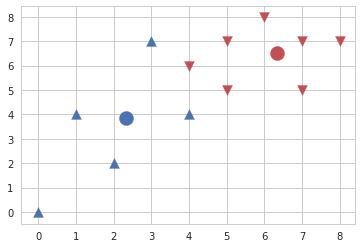

In [56]:
plot_cluster(model2, c0, c1)

In [58]:
kmeans_df(model2, c0, c1)

,x0,x1,d0,d1,c
0,7.0,5.0,1.641476,4.810290,0.0
1,5.0,7.0,1.424001,4.139914,0.0
2,7.0,7.0,0.833333,5.639641,0.0
3,4.0,4.0,3.419714,1.674979,1.0
4,4.0,6.0,2.386304,2.733537,0.0
5,1.0,4.0,5.890199,1.343710,1.0
6,0.0,0.0,9.075302,4.487637,1.0
7,2.0,2.0,6.247222,1.863390,1.0
8,8.0,7.0,1.740051,6.491447,0.0
9,6.0,8.0,1.536591,5.550275,0.0


In [59]:
calc_new_centroid(model2)

((6.0, 6.428571428571429), (2.0, 3.4))

## 3회차

In [64]:
model3 = KMeans(n_clusters = 2 , init= 'random', n_init = 1, 
               max_iter=3, random_state = 1).fit(X)

In [65]:
c0, c1 = model3.cluster_centers_
c0, c1

(array([6.        , 6.42857143]), array([2. , 3.4]))

In [66]:
model3.score(X)

-52.2808163265307

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\font_manager.py:1320: UserWarning: findfont: Font family ['nanumgothic'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


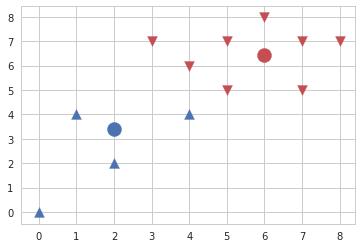

In [68]:
plot_cluster(model3, c0, c1)

In [69]:
kmeans_df(model3, c0, c1)

,x0,x1,d0,d1,c
0,7.0,5.0,1.743794,5.249762,0.0
1,5.0,7.0,1.151751,4.686150,0.0
2,7.0,7.0,1.151751,6.161169,0.0
3,4.0,4.0,3.146102,2.088061,1.0
4,4.0,6.0,2.045403,3.280244,0.0
5,1.0,4.0,5.558593,1.166190,1.0
6,0.0,0.0,8.793551,3.944617,1.0
7,2.0,2.0,5.967600,1.400000,1.0
8,8.0,7.0,2.080031,6.997142,0.0
9,6.0,8.0,1.571429,6.095900,0.0


In [70]:
calc_new_centroid(model3)

((5.625, 6.5), (1.75, 2.5))

## 4회차

In [78]:
model4 = KMeans(n_clusters = 2, init = 'random', n_init = 1,
              max_iter = 4, random_state = 1).fit(X)

In [80]:
c0, c1 = model4.cluster_centers_

In [81]:
c0, c1

(array([5.625, 6.5  ]), array([1.75, 2.5 ]))

In [82]:
model4.score(X)

-47.625

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\font_manager.py:1320: UserWarning: findfont: Font family ['nanumgothic'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


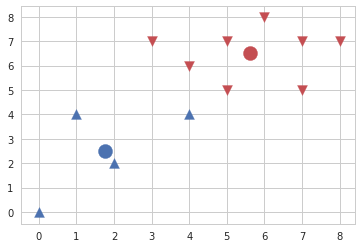

In [84]:
plot_cluster(model4, c0, c1)

In [86]:
kmeans_df(model4, c0, c1)

,x0,x1,d0,d1,c
0,7.0,5.0,2.034853,5.814852,0.0
1,5.0,7.0,0.800391,5.550901,0.0
2,7.0,7.0,1.463087,6.914658,0.0
3,4.0,4.0,2.981715,2.704163,1.0
4,4.0,6.0,1.700184,4.160829,0.0
5,1.0,4.0,5.257435,1.677051,1.0
6,0.0,0.0,8.595966,3.051639,1.0
7,2.0,2.0,5.778462,0.559017,1.0
8,8.0,7.0,2.427061,7.701461,0.0
9,6.0,8.0,1.546165,6.950719,0.0


In [87]:
calc_new_centroid(model4)

((5.625, 6.5), (1.75, 2.5))

## 5회차

In [91]:
model5 = KMeans(n_clusters = 2, init='random', n_init = 1,
               max_iter = 5, random_state = 1).fit(X)

In [92]:
c0, c1 = model5.cluster_centers_

In [93]:
model5.score(X)

-47.625

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\font_manager.py:1320: UserWarning: findfont: Font family ['nanumgothic'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


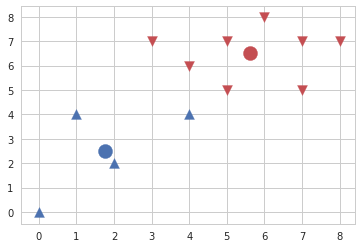

In [94]:
plot_cluster(model5, c0, c1)

In [95]:
kmeans_df(model5, c0, c1)

,x0,x1,d0,d1,c
0,7.0,5.0,2.034853,5.814852,0.0
1,5.0,7.0,0.800391,5.550901,0.0
2,7.0,7.0,1.463087,6.914658,0.0
3,4.0,4.0,2.981715,2.704163,1.0
4,4.0,6.0,1.700184,4.160829,0.0
5,1.0,4.0,5.257435,1.677051,1.0
6,0.0,0.0,8.595966,3.051639,1.0
7,2.0,2.0,5.778462,0.559017,1.0
8,8.0,7.0,2.427061,7.701461,0.0
9,6.0,8.0,1.546165,6.950719,0.0


In [96]:
calc_new_centroid(model5)

((5.625, 6.5), (1.75, 2.5))

## K-Means ++
- K-means++ Algorithm은 최초의 중심값을 설정하기 위한 알고리즘이다. 
    1. 중심값을 저장할 집합 M준비 
    2. 일단 하나의 중심 u0을 랜덤하게 선택하여 M에 넣는다.
    3. M에 속하지 않는 모든 샘플 xi에 대해 거리 d(M, xi)를 계산. d(M, xi)는 M안의 모든 샘플 uk에 대해 d(uk, xi)를 계산하여 가장 작은 값 선택
    4. d(M, xi)에 비례한 확률로 다음 중심 u를 선택.
    5. K 개의 중심을 선택할 때까지 반복
    6. K-Means 알고리즘 사용

### 예: Iris

In [97]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import KMeans
from sklearn import datasets

np.random.seed(5)
cetners  = [[1, 1], [-1, -1], [1, -1]]
iris = datasets.load_iris()
X = iris.data
y = iris.target

def plot_iris_cluster(model):
    fig = plt.figure()
    ax = Axes3D(fig, rect = [0, 0, .95, 1], elev=48, azim=134)
    model.fit(X)
    labels = model.labels_
    ax.scatter(X[:, 3], X[:, 0], X[:, 2], c=labels.astype(np.float),
               s=100, cmap = mpl.cm.jet)
    ax.w_xaxis.set_ticklabels([])
    ax.w_yaxis.set_ticklabels([])
    ax.w_zaxis.set_ticklabels([])
    ax.set_xlabel('Petal width')
    ax.set_ylabel('Sepal length')
    ax.set_zlabel('Petal length')
    plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\font_manager.py:1320: UserWarning: findfont: Font family ['nanumgothic'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


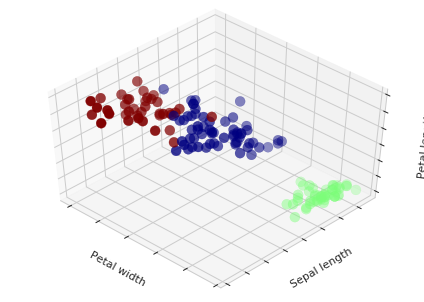

In [99]:
model3 = KMeans(n_clusters = 3)
plot_iris_cluster(model3)

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\font_manager.py:1320: UserWarning: findfont: Font family ['nanumgothic'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


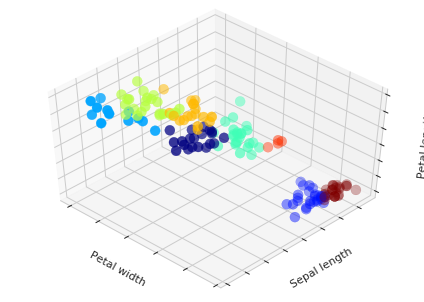

In [101]:
model8 = KMeans(n_clusters = 8)
plot_iris_cluster(model8)

## 예: Digit Image

In [108]:
from sklearn.datasets import load_digits
from sklearn.preprocessing import scale

digits = load_digits()
data = scale(digits.data)

def show_digits(images, labels):
    f = plt.figure(figsize=(10, 2))
    plt.subplots_adjust(top= 1, hspace = 0, wspace = 0.05)
    i = 0
    while (i < 10 and i < images.shape[0]):
        ax = f.add_subplot(1, 10, i+1)
        ax.imshow(images[i], cmap=plt.cm.bone)
        ax.grid(False)
        ax.table
        ax.set_title(labels[i])
        ax.xaxis.set_ticks([])
        ax.yaxis.set_ticks([])
        plt.tight_layout()
        i += 1

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\font_manager.py:1320: UserWarning: findfont: Font family ['nanumgothic'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


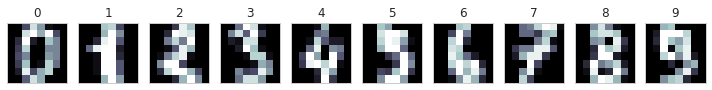

In [109]:
show_digits(digits.images, range(10))

In [110]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test, images_train, images_test = \
    train_test_split(data, digits.target, digits.images,
                     test_size=0.25, random_state=42)

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\font_manager.py:1320: UserWarning: findfont: Font family ['nanumgothic'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


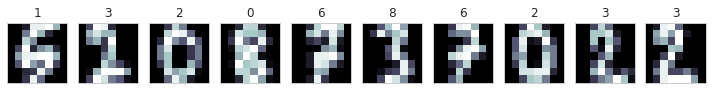

In [112]:
model = KMeans(init = 'k-means++', n_clusters = 10, random_state =42)

model.fit(X_train)

show_digits(images_train, model.labels_)

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\font_manager.py:1320: UserWarning: findfont: Font family ['nanumgothic'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


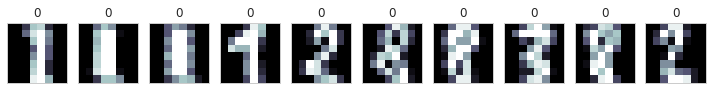

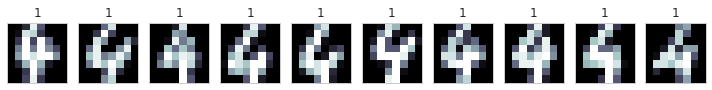

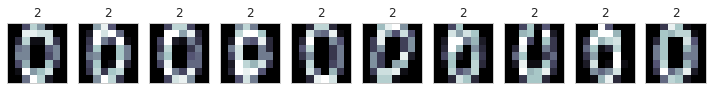

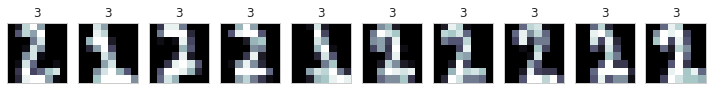

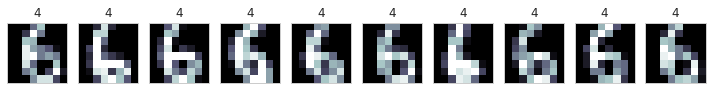

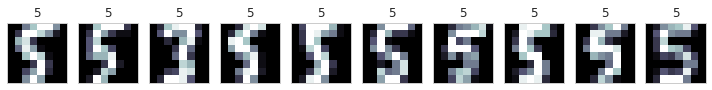

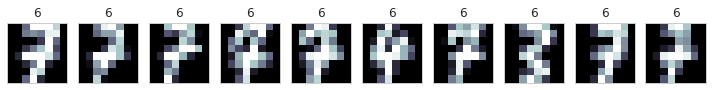

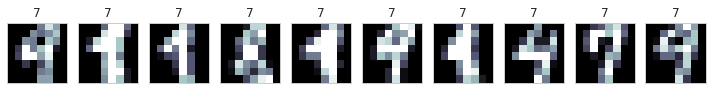

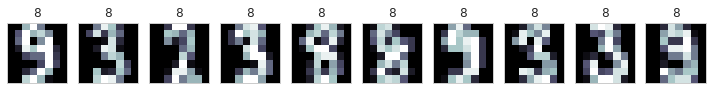

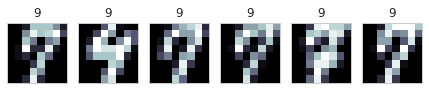

In [113]:
y_pred = model.predict(X_test)

def show_cluster(images, y_pred, cluster_number):
    images = images[y_pred == cluster_number]
    y_pred = y_pred[y_pred == cluster_number]
    show_digits(images, y_pred)
    
for i in range(10):
    show_cluster(images_test, y_pred, i)

In [114]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[ 0,  0, 43,  0,  0,  0,  0,  0,  0,  0],
       [20,  0,  0,  7,  0,  0,  0, 10,  0,  0],
       [ 5,  0,  0, 31,  0,  0,  0,  1,  1,  0],
       [ 1,  0,  0,  1,  0,  1,  4,  0, 39,  0],
       [ 1, 50,  0,  0,  0,  0,  1,  2,  0,  1],
       [ 1,  0,  0,  0,  1, 41,  0,  0, 16,  0],
       [ 0,  0,  1,  0, 44,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  1, 34,  1,  0,  5],
       [21,  0,  0,  0,  0,  3,  1,  2, 11,  0],
       [ 0,  0,  0,  0,  0,  2,  3,  3, 40,  0]], dtype=int64)

## 클러스터링 성능 기준 
- 정확한 답을 알고 있는 경우
- 정확한 답을 모르는 경우

### 정확한 답(클러스터의 갯수 및 소속)을 알고 있는 경우
- Adjusted Rand Index
- Adjusted Mutual Information
- Homogeneity, completeness, V-measure
### 정확한 답(클러스터의 갯수 및 소속)을 모르는 경우
- 실루엣 계수 (Silhouette Coefficient)

Automatically created module for IPython interactive environment
For n_clusters =  2 The average silhouette_score is : 0.7049787496083262


C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\font_manager.py:1320: UserWarning: findfont: Font family ['nanumgothic'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


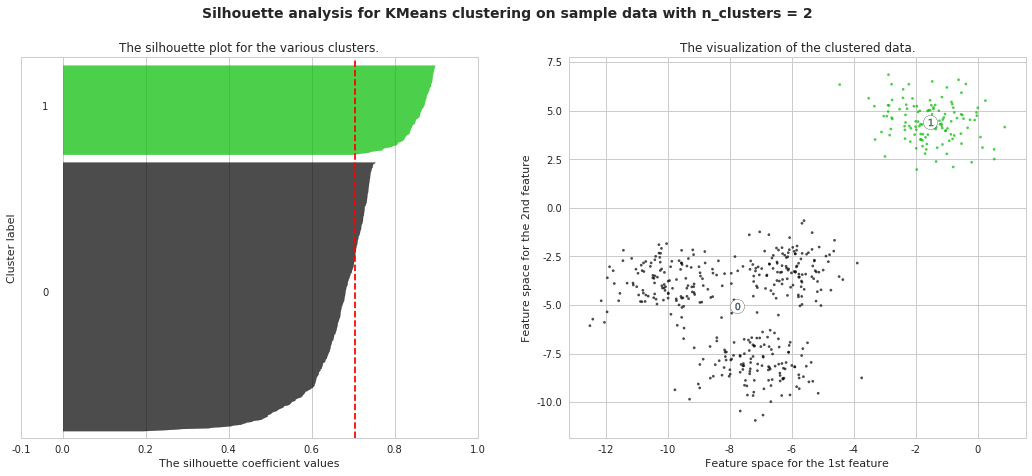

For n_clusters =  3 The average silhouette_score is : 0.5882004012129721


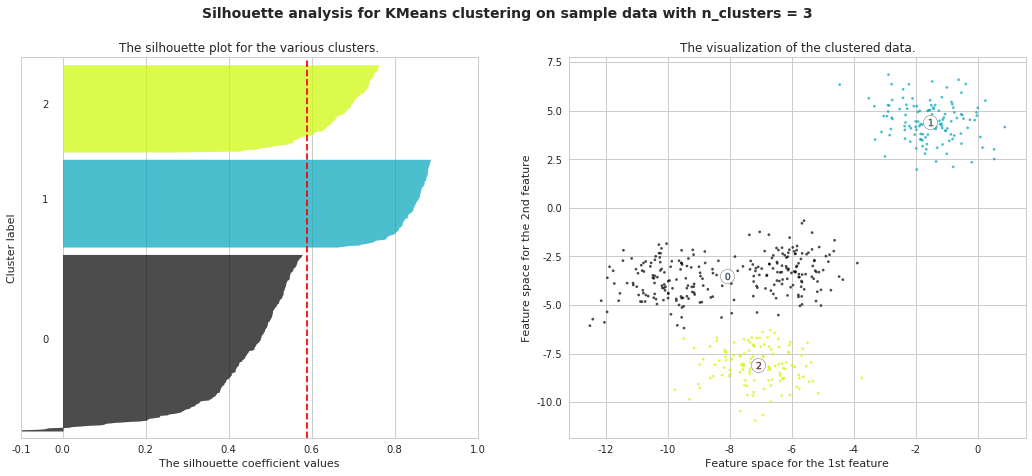

For n_clusters =  4 The average silhouette_score is : 0.6505186632729437


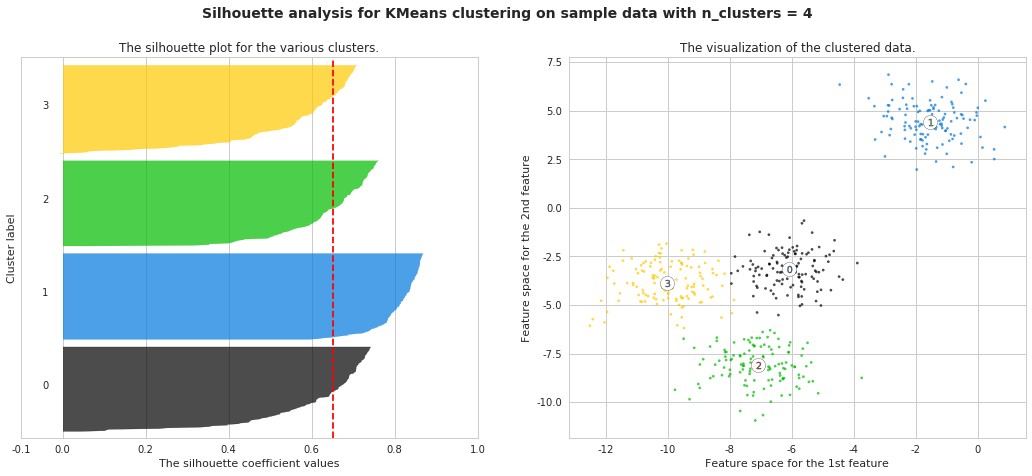

For n_clusters =  5 The average silhouette_score is : 0.56376469026194


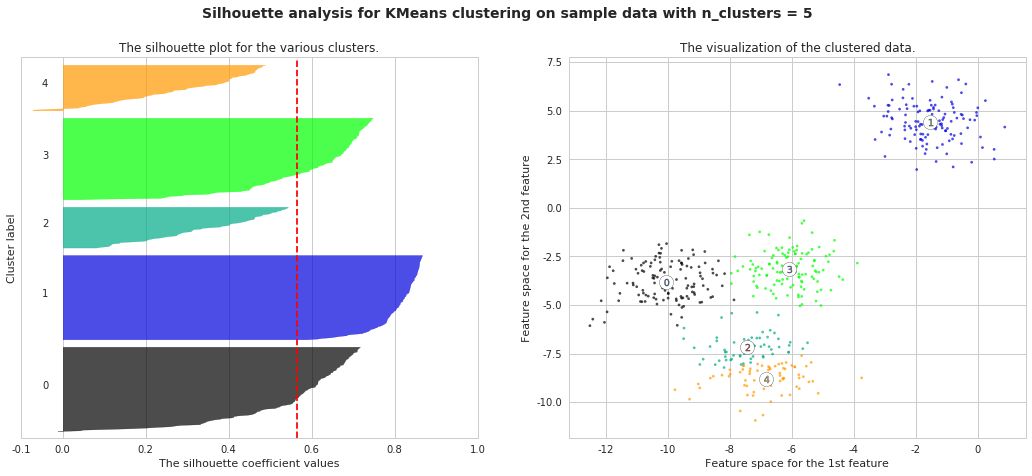

For n_clusters =  6 The average silhouette_score is : 0.4504666294372765


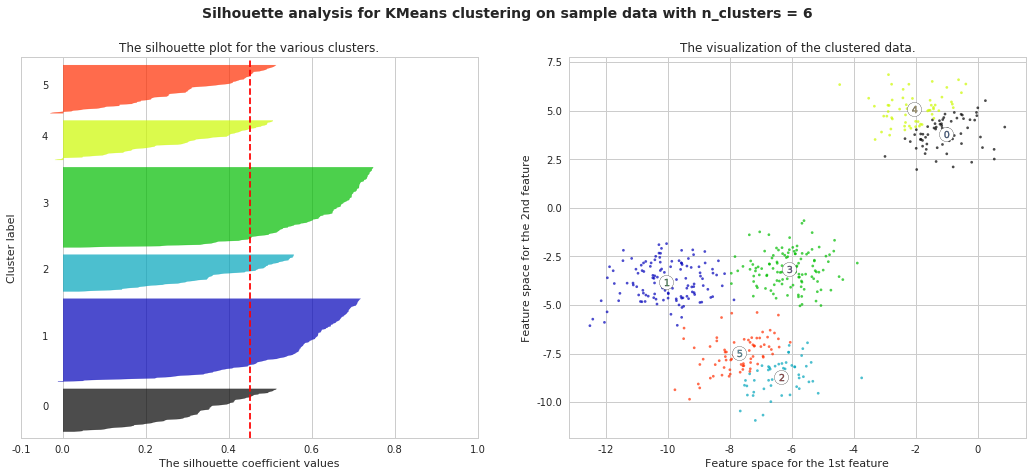

In [118]:
from __future__ import print_function
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

print(__doc__)

# Generating the sample data from make_blobs
# This particular setting has one distinct cluster and 3 clusters placed close
# together.
X, y = make_blobs(n_samples = 500,
                  n_features = 2,
                  centers = 4,
                  cluster_std = 1,
                  center_box = (-10.0, 10.0),
                  shuffle=True, 
                  random_state=1)  # For reproducibility

range_n_clusters = [2, 3, 4, 5, 6]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)
    
    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1 to 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1) * 10 is for inserting blank space between silhouette
    # plots of individual clusters to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])
    
    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)
    
    # The silhouette_score gives the average value for all the samples
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print('For n_clusters = ', n_clusters, 
          'The average silhouette_score is :', silhouette_avg)
    
# Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

    plt.show()